# Student Performance Indicator

### Table of Contents
1. Problem Statement

2. Data Collection

   2.1 - Imports

   2.2 - Dataset Information

3. EDA - Data Checks

    3.1 Missing Values

    3.2 Duplicates

    3.3 Data Types

    3.4 Unique Values

    3.5 General Statistics

    3.6 Exploring Data

    3.7 Adding "Total Score" and "Average"
    
4. EDA - Visualization

    4.1 Average Score Distribution 

    4.2 Students Maximum Score

    4.3 Multivariate Analysis

5. Feature Wise Visualization

    5.1 Gender

    5.2 Ethnicity

    5.3 Parental Level of Education

    5.4 Lunch

    5.5 Test Preparation

6. Outliers

7. Conclusions



### 1) Problem Statement
- This project seeks to understands how the student's performance (test scores) is affected by other variables such as: Gender, Ethnicity, Parental level of education, Lunch and Test preparation.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### 2.1 Imports

- Importing nescessary libs for data analysis and visualization

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

- Importing CSV data as Dataframe

In [2]:
df = pd.read_csv('data/studs_performance.csv')

#### 2) Dataset Information

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

With the information above, we can conclude that the dataset has the total of 1000 rows and 8 columns with following variables:

- Gender : Male and Female

- Ethnicity : Groups A, B, C, D, E

- Parental Level of Education : parents' final education -> (bachelor's degree,some college,master's degree,associate's degree,high school)

- Lunch : having lunch before test (standard or free/reduced)

- Test Preparation Course : complete or not complete before test

- Math score

- Reading score

- Writing score

#### 3) EDA - Data Checks

##### 3.1 Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values 

##### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicated values 

##### 3.3 Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Unique Values   

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 3.5 General Statistics

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- Mean value's are very close to each other - between 66 and 68.05;

- Standard Deviations are also close - between 14.6 and 15.19;

- Minimum score 0 for Math, for Writing minimum is much higher = 10 and higher for Reading = 17

##### 3.6 Exploring Data



In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print results
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical_features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


##### 3.7 Adding "Total Score" and "Average"

In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
def count_max_score(df, subject, score):
    return df[df[subject] == score]['average'].count()

reading_max_score = count_max_score(df, 'reading score', 100)
writing_max_score = count_max_score(df, 'writing score', 100)
math_max_score = count_max_score(df, 'math score', 100)

In [16]:
print("Reading Max Score:", reading_max_score)
print("Writing Max Score:", writing_max_score)
print("Math Max Score:", math_max_score)


Reading Max Score: 17
Writing Max Score: 14
Math Max Score: 7


In [17]:
def count_min_score(df, subject, threshold):
    return df[df[subject] <= threshold]['average'].count()

reading_min_score = count_min_score(df, 'reading score', 20)
writing_min_score = count_min_score(df, 'writing score', 20)
math_min_score = count_min_score(df, 'math score', 20)

In [18]:
print("Reading Min Score:", reading_min_score)
print("Writing Min Score:", writing_min_score)
print("Math Min Score:", math_min_score)

Reading Min Score: 1
Writing Min Score: 3
Math Min Score: 4


Insights
- Worst performance in Maths

- Best performance in Reading

#### 4) EDA - Visualization 

##### 4.1 Average Score Distribution

- Histogram
- Kernel Distribution Function (KDE)

In [19]:
def plot_histograms_kde(data,variable, hue=None):
    fig, axs = plt.subplots(1,2, figsize=(8, 4))

    plt.subplot(121)
    sns.histplot(data=data, x=variable, bins=30, kde=True, color='g')

    plt.subplot(122)
    sns.histplot(data=data, x=variable, kde=True, hue=hue)

    plt.show()

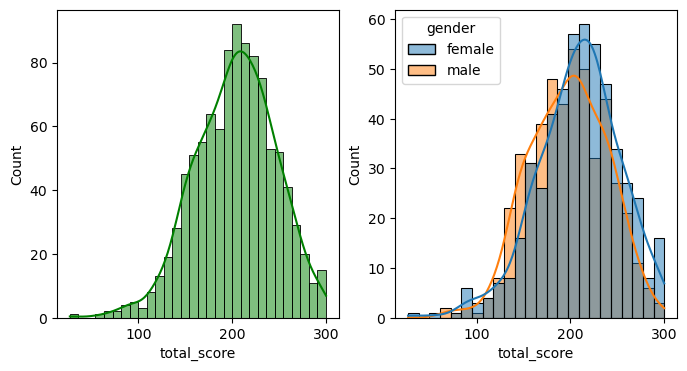

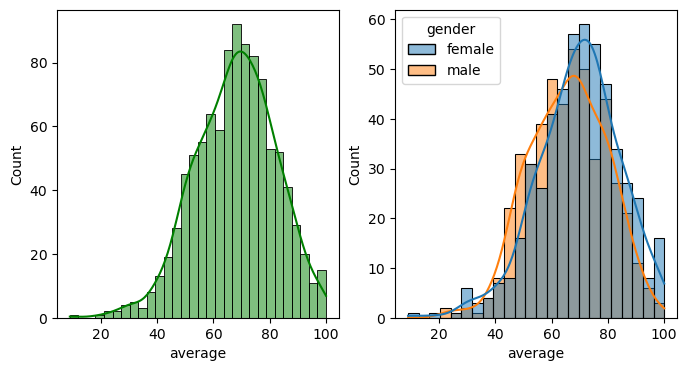

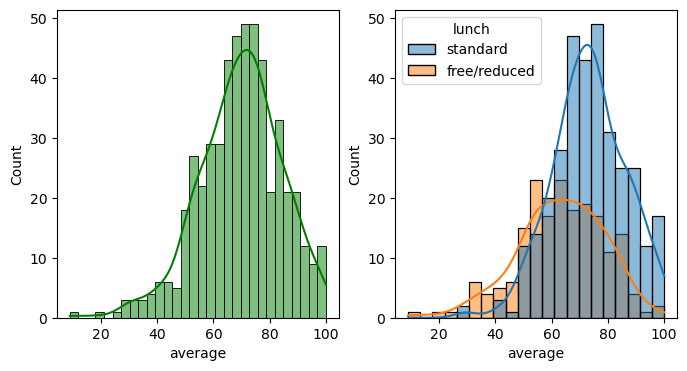

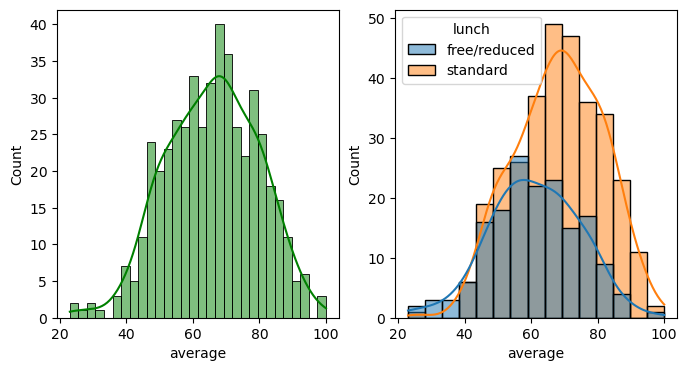

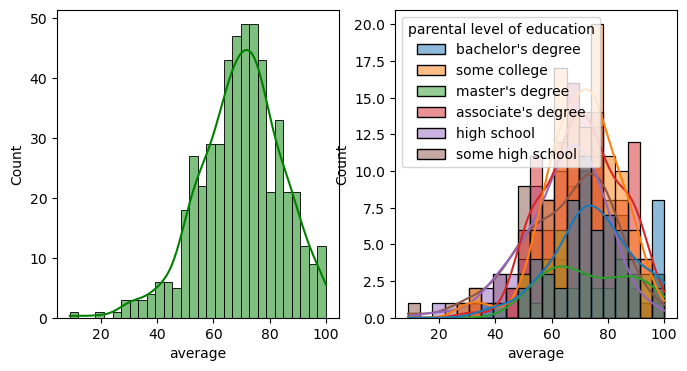

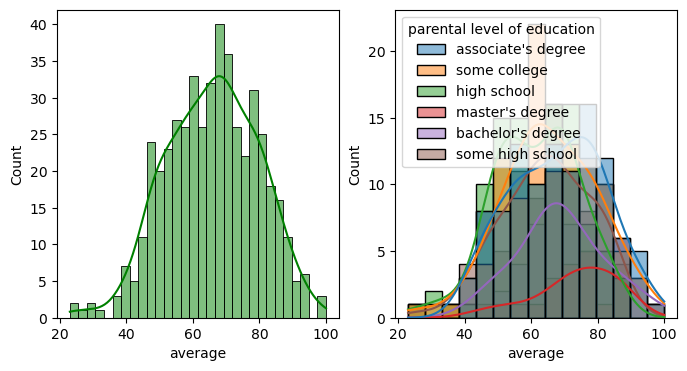

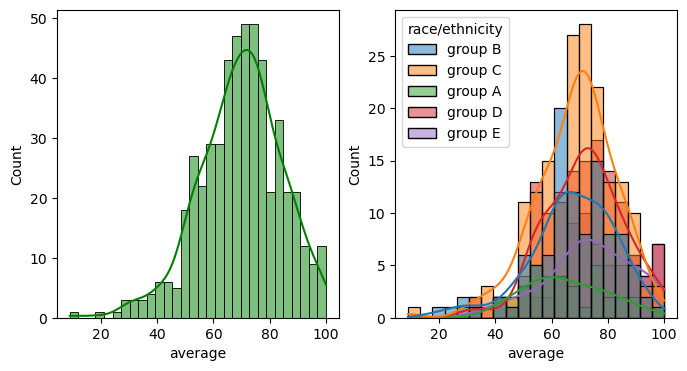

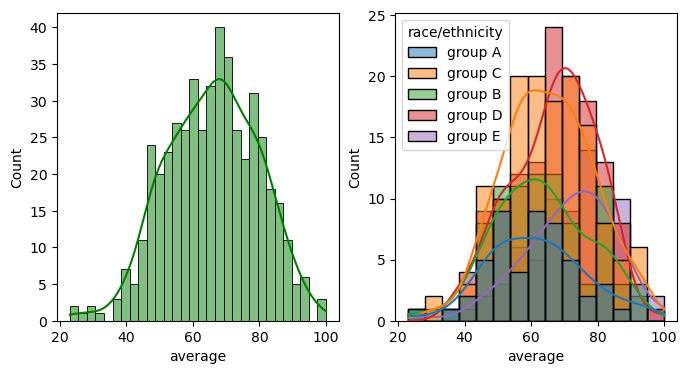

In [20]:
# Total Score
plot_histograms_kde(df, 'total_score', hue='gender')

# Average
plot_histograms_kde(df, 'average', hue='gender')

#Lunch
plot_histograms_kde(df[df.gender=='female'], 'average', hue='lunch')
plot_histograms_kde(df[df.gender=='male'], 'average', hue='lunch')

# Parental Level of Education
plot_histograms_kde(df[df.gender=='female'], 'average', hue='parental level of education')
plot_histograms_kde(df[df.gender=='male'], 'average', hue='parental level of education')

# Ethnicity
plot_histograms_kde(df[df.gender=='female'], 'average', hue='race/ethnicity')
plot_histograms_kde(df[df.gender=='male'], 'average', hue='race/ethnicity')



##### Insights

Average and Total Score
- Female students usually perform better than Male students

Lunch
- Standard lunch helps having a better performance in exams be it a male or a female.

Parental Level of Education
- In general parent's education don't help student perform well in exam;
- In the 2rd plot it seems parent's education don't make  on female students.
- In the 3nd plot shows that Male Students perform better if parent's with associate's degree or master's degree; 

Ethnicity
- Male and Female Students of group A and group B tends to perform poorly in exam.


##### 4.2 Students Maximum Score

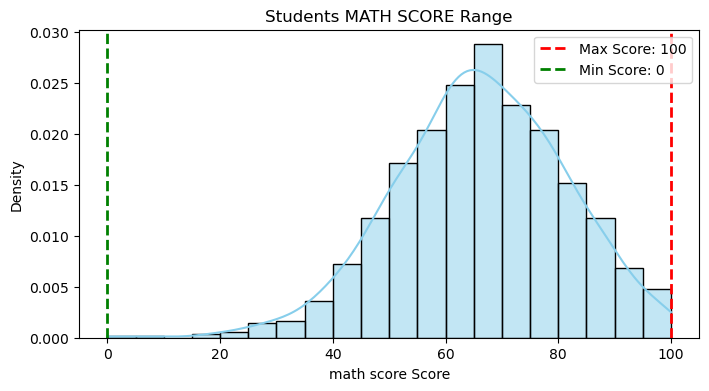

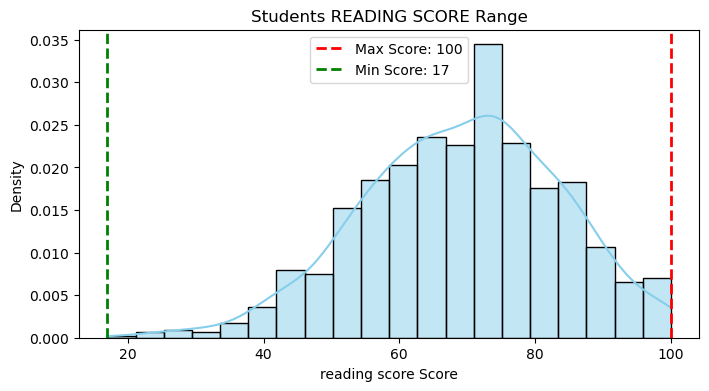

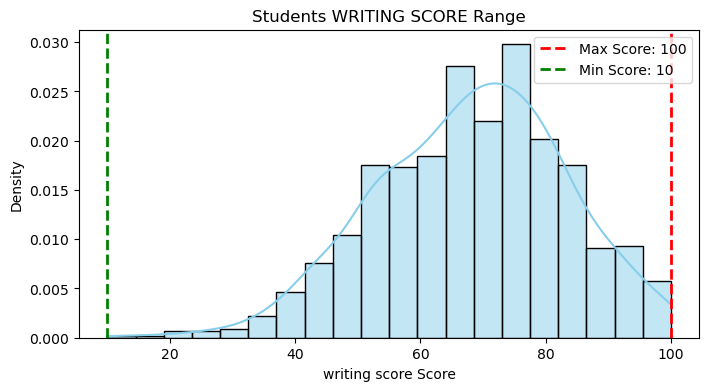

In [30]:
def plot_scores_range(data):
    # Define the variables for which we want to plot score ranges
    scores_variables = ['math score', 'reading score', 'writing score']

    # Loop through each variable and plot the score range
    for variable in scores_variables:
        # Get the maximum and minimum scores for the current variable
        max_score = data[variable].max()
        min_score = data[variable].min()

        # Figure Size
        plt.figure(figsize=(8, 4))
        
        # Plot Title
        plt.title(f'Students {variable.upper()} Range')
        
        # Plot a histogram with density estimation for the current variable
        sns.histplot(data[variable], bins=20, kde=True, color='skyblue', stat='density')
        
        # Add a dashed red line to indicate the maximum score
        plt.axvline(max_score, color='red', linestyle='dashed', linewidth=2, label=f'Max Score: {max_score}')
        
        # Add a dashed green line to indicate the minimum score
        plt.axvline(min_score, color='green', linestyle='dashed', linewidth=2, label=f'Min Score: {min_score}')
        
        # Display a legend in the upper right corner
        plt.legend()
        
        # Label the x-axis
        plt.xlabel(f'{variable} Score')
        
        # Label the y-axis
        plt.ylabel('Density')
        
        # Show the plot
        plt.show()

# Display the maximum and minimum scores for math score, reading score, and writing score
plot_scores_range(df)


##### Insights

- From the data visualization above we can identify that most of the students score is in between 60-80 in Maths and for Reading and Writing score goes from 50-80